# Music Genre Classification using ML techniques

I am a big fan of music and a big time Spotify user. I like all kind of music Blues, R&B, Country, EDM etc. My all time favourites are BB king, Eric Clapton, in bands I like Pink Floyd, Led Zepplin, it's a big list. I always wondered how Spotify music suggestion works. I was pretty much sure that they are certainly using Machine Learning for music suggestion but I want to understand what are the feature variables they are using. I took this course online on Data Camp which was very helpful in understanding implementaion of ML for a compete new industry. 

Link to Project is here : https://projects.datacamp.com/projects/449, I will suggest anyone who is interested in music industry to take this course

I made a lot of add-ons in the project to do some more analysis. 

You can download data sets here : 
Echonest Metrics : https://bit.ly/2HTZmAh<br>
FMA Rock Vs HipHop : https://bit.ly/2Qkdy9d



## Feature Set of Sounds

Sound is an audio signal which have parametes like banwidth, amplitude, frequency, energy & frequency. A very basic audio signal can be sumarised with below image 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data/Sound Char.png",width=500, height=400)

# Image Source : https://bit.ly/2W5PmOl

List of Features that we have 
<ul>
    <li><b>Acousticness</b> - Pertaining to the sense or organs of hearing, to sound, or to the science of sound.</li>
    <li>Danceability </li>
    <li>Energy</li>
    <li>Instrumentalness</li>
    <li>Liveness</li>
    <li>Speechiness</li>
    <li>Tempo</li>
    <li><b>Valence</b> - Valence, as used in psychology, especially in discussing emotions, means the intrinsic attractiveness/"good"-ness (positive valence) or averseness/"bad"-ness (negative valence) of an event, object, or situation</li></ul>

## Exploring the data sets

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Read in track metadata with genre labels
print("Tracks Dataset")
tracks = pd.read_csv("data/fma-rock-vs-hiphop.csv")
print(list(tracks))

print()
print("************")
# Read in track metrics with the features
echonest_metrics =  pd.read_json("data/echonest-metrics.json",precise_float=True)
print("Echonest Metrics")
print(list(echonest_metrics))

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks =  echonest_metrics.merge(tracks[['track_id','genre_top']],on='track_id')
print()
print("************")
print("Combined Datasets information")
# Inspect the resultant dataframe
print(echo_tracks.info())
print(echo_tracks.shape)

Tracks Dataset
['track_id', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'duration', 'favorites', 'genre_top', 'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens', 'lyricist', 'number', 'publisher', 'tags', 'title']

************
Echonest Metrics
['track_id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

************
Combined Datasets information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dt

## Check for Correlation

We will remove the features from the data set which are highly correlated because of two reasons.<br> 
1) Redundancy cause the model to overfit <br>
2) More the features more complex our model is

In [4]:
print("No such strong relation exsists between 2 features")
Correlation=echo_tracks.corr()
Correlation.style.background_gradient()


No such strong relation exsists between 2 features


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1


## Standardization of dataset and PCA to understand variability and important features

PCA can help us find the key features which can explain the variance between labels. PCA rotates the data along the axis with of highest variance, thus allowing us to explain key contributors. PCA makes use of raw values because of which a feature having broad range of value will dominate over others. We don't want that so we will standardise all the features.  

In [5]:
# extract features
features=echo_tracks.drop(['track_id','genre_top'],axis=1)
# Declare Labels
labels=echo_tracks['genre_top']

scaler=StandardScaler()
scaled_train_features=scaler.fit_transform(features)

Text(0.5, 0, '# Features')

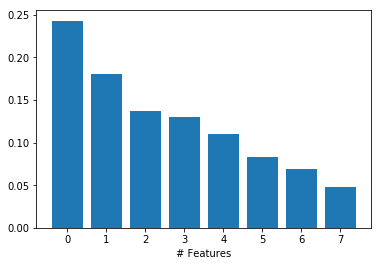

In [6]:
from sklearn.decomposition import PCA

pca=PCA()
mode=pca.fit(scaled_train_features)
evr=pca.explained_variance_ratio_

fig,ax=plt.subplots()
ax.bar(range(0,8),evr)
ax.set_xlabel("# Features")

The above graph doesn't give us a very good idea about the features. How many features do we need to explain the variance in our labels? can be answered by one more way. We can take a cumulative sum of the variances for factors and cut off graph at 90%.

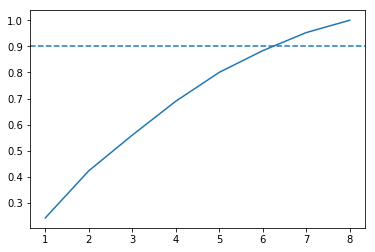

In [7]:
import numpy as np

explained_var=np.cumsum(evr)

fig,ax=plt.subplots()
ax.plot(range(1,9),explained_var)
ax.axhline(y=0.9,linestyle='--')
n_components=6

pca=PCA(n_components, random_state=42)
pca.fit(scaled_train_features)
pca_projection=pca.transform(scaled_train_features)

We just reduced the dimensions of our feature set. We can now fit the data on Machine Learning algorithms

## Fitting labels using Machine Learning: Decision Tree

In [8]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)
print("Decision Tree Score")
print(tree.score(test_features, test_labels))
print()
print("**********")
print("Confusion Matrix ")
print(pd.crosstab(pred_labels_tree, test_labels))

Decision Tree Score
0.8709408825978351

**********
Confusion Matrix 
genre_top  Hip-Hop  Rock
row_0                   
Hip-Hop        152    78
Rock            77   894


## Fitting Labels Using Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logreg=logreg.predict(test_features)

from sklearn.metrics import classification_report

class_rep_tree=classification_report(test_labels,pred_labels_tree)
class_rep_log=classification_report(test_labels,pred_labels_logreg)

print('Decision Tree: \n',class_rep_tree)
print('Logistic Regression : \n',class_rep_log)


Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.66      0.66      0.66       229
        Rock       0.92      0.92      0.92       972

   micro avg       0.87      0.87      0.87      1201
   macro avg       0.79      0.79      0.79      1201
weighted avg       0.87      0.87      0.87      1201

Logistic Regression : 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.57      0.65       229
        Rock       0.90      0.95      0.93       972

   micro avg       0.88      0.88      0.88      1201
   macro avg       0.83      0.76      0.79      1201
weighted avg       0.87      0.88      0.87      1201



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


From the above Crosstab and classification_report we can see that model fits the Rock very godd but not the Hip-Hop. This is not a very ideal model, imagine we have 1000 cases of "Rock" and 100 cases of "Hip-Hop", the prob that you will randomly pick up "Rock" and be right is very high, than when you want to pick up "Hip-Hop". 

To tackle this inbalance we need to have same number of cases for both "Rock" and "Hip-Hop" so that our model is not skewed.

### Balancing our datasets with equal number of Rock and Hip-Hop

In [10]:
hiphop=echo_tracks[echo_tracks['genre_top']=='Hip-Hop']
rock=echo_tracks[echo_tracks['genre_top']=='Rock']
# resampling equal number of Rock cases as of hiphop and concat both new dfs to create a balanced dataset
rock=rock.sample(len(hiphop),random_state=10)

# Concat 2 dfs
rock_hiphop=pd.concat([hiphop,rock])


# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hiphop.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hiphop['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels,random_state=10)

Now we have a balanced dataset with correct dimension reduced we can again fit our models on Tree and LogReg

### Fitting balanced dataset on DecisionTree and Logistic regression

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tree=DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
tree_pred_val=tree.predict(test_features)

logreg=LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
logreg_pred_val=logreg.predict(test_features)


print("Decision Tree: \n", classification_report(test_labels,tree_pred_val))
print(pd.crosstab(test_labels,tree_pred_val))

print()
print("******")
print("Logistic Regression: \n", classification_report(test_labels,logreg_pred_val))
print(pd.crosstab(test_labels,logreg_pred_val))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.78      0.77       225
        Rock       0.78      0.76      0.77       230

   micro avg       0.77      0.77      0.77       455
   macro avg       0.77      0.77      0.77       455
weighted avg       0.77      0.77      0.77       455

col_0      Hip-Hop  Rock
genre_top               
Hip-Hop        176    49
Rock            56   174

******
Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.85      0.84       225
        Rock       0.85      0.82      0.83       230

   micro avg       0.84      0.84      0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455

col_0      Hip-Hop  Rock
genre_top               
Hip-Hop        192    33
Rock            42   188


Now our model seems quite a lot balanced

### Using Cross Validation to evaluate models

In [12]:
from sklearn.model_selection import KFold, cross_val_score

kf=KFold(n_splits=10,random_state=10)

tree=DecisionTreeClassifier(random_state=10)
logreg=LogisticRegression(random_state=10)

tree_score=cross_val_score(tree,pca_projection,labels,cv=kf)
logreg_score=cross_val_score(logreg,pca_projection,labels,cv=kf)

print("Decision Tree score:",np.mean(tree_score),"Logistic Regression",np.mean(logreg_score))




Decision Tree score: 0.724175824175824 Logistic Regression 0.7752747252747252
